In [15]:
from zget_data import get_responses, get_qdetails, page_map, attention
import pandas as pd
import json

In [16]:
password_response, time_response, survey_response = get_responses(3)

## Password Analysis

In [17]:
pd.DataFrame(password_response)

,password2
0,ihtgoojd24
1,Bwmfd1!
2,6754$#
3,ASD!@#qwe
4,C4PcQEFpKx3oE9
5,Iwsd!123
6,Id5l@daa
7,Ilsd4itaf!2


## Time Analysis

In [18]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
page_time_df

,fcog,fpassrecall,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,5.453,28.630,15.469,29.669,147.708,243.538,12.105,96.265,8.017,70.176,15.129,48.560,12.011983
1,390.267,33.952,8.106,44.250,45.859,108.347,13.635,41.843,12.956,54.012,12.891,47.699,13.563617
2,5.307,6.465,8.567,4.670,35.472,165.960,10.517,22.076,14.942,39.105,10.935,20.554,5.742833
3,29.726,13.797,5.700,10.044,28.246,69.622,4.614,12.540,4.460,20.869,6.210,38.585,4.073550
4,1.812,13.238,4.827,25.727,43.211,91.152,6.373,70.961,7.238,33.089,12.031,34.607,5.737767
5,6.101,37.265,13.453,50.109,115.912,357.545,54.625,102.709,18.815,80.695,36.647,69.279,15.719250
6,4.826,19.859,12.699,47.198,47.816,189.106,17.843,148.283,8.283,56.086,12.759,70.091,10.580817
7,10.472,30.368,19.309,70.570,64.183,281.812,28.658,157.744,28.992,48.437,43.609,82.467,14.443683


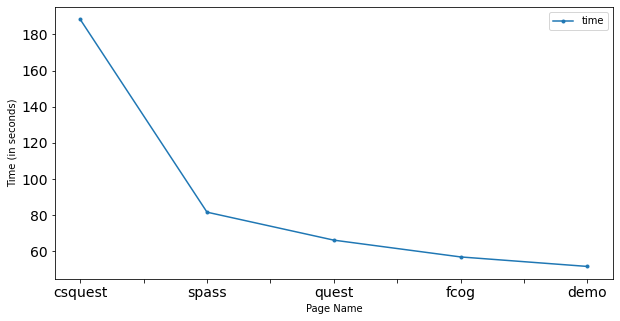

In [19]:
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.mean().sort_values(ascending=False).head(5).items():
    top5 = top5.append(pd.DataFrame([[i, data]], columns=top5.columns), ignore_index=True)

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in seconds)", fontsize=14, style=".-")

## Survey Response Analysis

In [20]:
survey_response_df = pd.DataFrame(survey_response)

### Quest

In [21]:
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest.drop(attention.get('7'), inplace=True)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest['median'] = quest.median(axis=1)
quest

,0,1,2,3,4,5,6,7,mean,median
helpful,5.0,6.0,4.0,3.0,6.0,5.0,7.0,7.0,5.375,5.375
rewarding,5.0,6.0,1.0,4.0,4.0,4.0,7.0,6.0,4.625,4.625
structured,5.0,6.0,5.0,2.0,7.0,5.0,7.0,7.0,5.500,5.500
beneficial,6.0,5.0,6.0,3.0,5.0,4.0,7.0,7.0,5.375,5.375
well grouped,5.0,6.0,7.0,6.0,7.0,4.0,7.0,7.0,6.125,6.125
organized,6.0,6.0,6.0,3.0,7.0,3.0,7.0,7.0,5.625,6.000
ordered,6.0,6.0,4.0,4.0,7.0,4.0,7.0,7.0,5.625,6.000
useful,5.0,6.0,2.0,6.0,3.0,3.0,7.0,7.0,4.875,5.000
clear,5.0,6.0,5.0,5.0,5.0,4.0,7.0,7.0,5.500,5.000
easy to learn,6.0,3.0,5.0,5.0,5.0,5.0,6.0,6.0,5.125,5.000


### CSQuest

In [22]:
csquest = pd.DataFrame(survey_response_df['8'].to_dict())

qualindex = ['9-1', '11-1']
csquestqual = csquest.loc[qualindex]
csquestqual

,0,1,2,3,4,5,6,7
9-1,"[Email, Government Websites]",[Financial Websites],"[Financial Websites, Government Websites, Cour...","[Social Media, E-commerce Websites]","[Social Media, Financial Websites, E-commerce ...","[Social Media, E-commerce Websites]","[Email, Financial Websites, Government Website...","[Social Media, Email, Financial Websites, E-co..."
11-1,For me it is way too many steps as I already k...,"I like it, it is simple like texting with a fr...",It is good and very strong to create online ac...,I feel like it's very straight forward and rem...,The design is interesting for people who have ...,The presentation of the design is very basic.\...,It is clear and easy to follow. It's not comp...,It looks like a text message exchange between ...


In [23]:
csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)

normqsid = []
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)

csquestquant

,0,1,2,3,4,5,6,7,mean,median
Novel,5.0,7.0,5.0,3.0,7.0,3.0,7.0,7.0,5.500,5.500
To the Point,5.0,6.0,6.0,5.0,6.0,5.0,7.0,7.0,5.875,6.000
Well Organized,2.0,5.0,1.0,5.0,4.0,4.0,7.0,5.0,4.125,4.125
Informative,5.0,7.0,4.0,6.0,6.0,4.0,7.0,6.0,5.625,6.000
Engaging,6.0,3.0,5.0,5.0,5.0,5.0,6.0,6.0,5.125,5.000
Attractive,5.0,6.0,5.0,5.0,5.0,4.0,7.0,7.0,5.500,5.000
Creative,5.0,7.0,5.0,5.0,6.0,5.0,7.0,7.0,5.875,5.875
Easy to understand,6.0,6.0,7.0,7.0,6.0,4.0,7.0,2.0,5.625,6.000
Encourages me to create a strong password,7.0,7.0,3.0,5.0,6.0,6.0,7.0,7.0,6.000,6.000
Makes me feel capable of creating a strong password,6.0,7.0,5.0,4.0,5.0,6.0,7.0,6.0,5.750,6.000


### First Password Survey

In [24]:
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['mean'] = fpass.mean(axis=1)
fpass['median'] = fpass.median(axis=1)
fpass

,0,1,2,3,4,5,6,7,mean,median
"I do not change my passwords, unless I have to.",5,6,4,7,6,6,3,2,4.875,5.000
I use different passwords for different online accounts that I have.,7,5,6,6,7,6,7,7,6.375,6.375
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",7,6,6,5,6,6,6,7,6.125,6.000
I do not include special characters in my password if it’s not required.,1,2,5,2,1,2,1,2,2.000,2.000


### Second Password Survey

In [25]:
spass = pd.DataFrame(survey_response_df['12'].to_dict())

qualindex = ['8-1']
spassqual = spass.loc[qualindex]
spassqual

,0,1,2,3,4,5,6,7
8-1,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used a totally different strategy.,I used a variation of the strategy presented i...,I used a totally different strategy.,I used a variation of the strategy presented i...,I used the same strategy presented in the design.,I used the same strategy presented in the design.


In [26]:
spassquant = spass.drop(qualindex).fillna(0).astype(int)
spassquant.drop(attention.get('8'), inplace=True)

normqsid = []
normspassquant = 8 - spassquant.loc[normqsid]
spassquant.update(normquest)

new_index = {}
for qsid in spassquant.index:
    new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
spassquant = spassquant.rename(new_index)
spassquant['mean'] = spassquant.mean(axis=1)
spassquant['median'] = spassquant.median(axis=1)

spassquant

,0,1,2,3,4,5,6,7,mean,median
,5,6,4,7,7,6,6,7,6.000,6.00
Hard to remember,2,3,6,3,7,5,2,3,3.875,3.00
Can be easily guessed by a hacker,1,2,3,1,1,2,1,1,1.500,1.00
Can be easily guessed by my close friends or family members,1,2,5,1,1,2,1,1,1.750,1.00
Stronger than the passwords I usually use,3,6,5,2,1,2,7,6,4.000,4.00
,2,2,2,2,2,2,2,2,2.000,2.00
,5,6,5,5,2,6,7,6,5.250,5.25
,2,6,6,6,3,2,6,5,4.500,5.00


### Demographics

In [27]:
demo = pd.DataFrame(survey_response_df['14'].to_dict())

new_index = {}
for qsid in demo.index:
    new_index[qsid] = get_qdetails('14', qsid, 'keyword').split('\n')[0]

demo = demo.rename(new_index).transpose()
demo

,gender,age,race,highest education,education field,occupation,tech experience,cyber experience,adoption security expert
0,Man,Above 65 years old,[White],Four-year College Degree,Other areas of Engineering,Business or industry,Hold or held a work position,Hold or held a work position,2
1,Woman,60-64 years old,[White],Four-year College Degree,Business,Business or industry,Self-taught,No experience,6
2,Man,25-29 years old,[White],Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Formal training,Formal training,5
3,Man,35-39 years old,[White],Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Pursuing or completed a degree,Pursuing or completed a degree,7
4,Man,40-44 years old,[White],Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Hold or held a work position,Formal training,4
5,Man,30-34 years old,[White],Four-year College Degree,"Architecture, Design, and Arts",Business or industry,Self-taught,Self-taught,6
6,Woman,55-59 years old,[White],Two-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Pursuing or completed a degree,No experience,7
7,Man,60-64 years old,[White],Two-year College Degree,Automotive Technology,Business or industry,Self-taught,Self-taught,6


In [28]:
demo['gender'].value_counts()

Man      6
Woman    2
Name: gender, dtype: int64